In [1]:
#importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the dataset
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
# Display column names
df.columns

# Basic statistics of the dataset
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


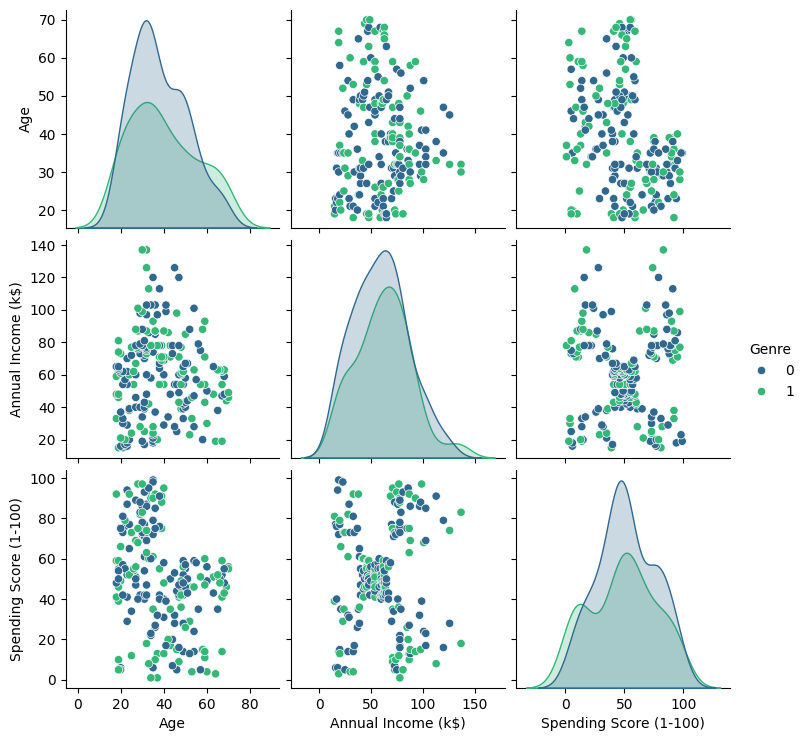

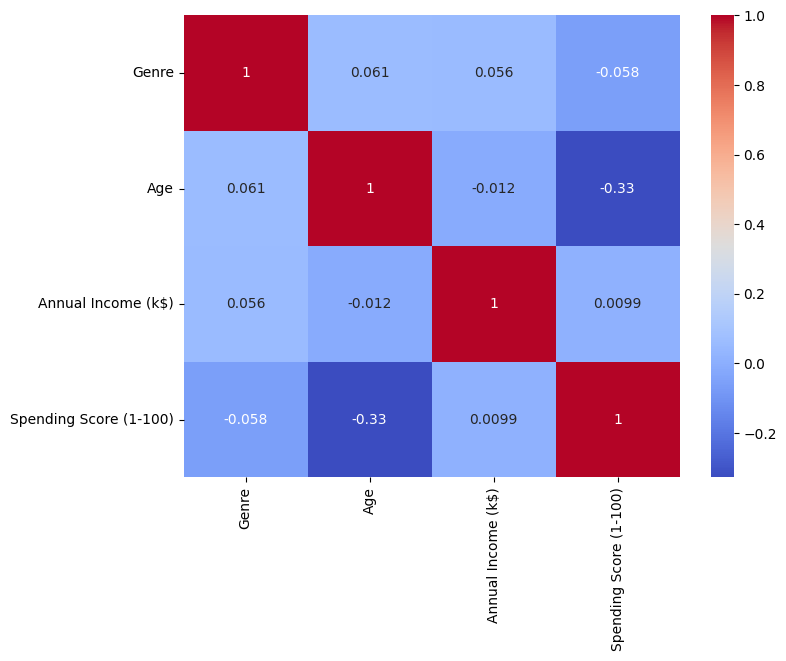

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships
sns.pairplot(df, hue='Genre', palette='viridis')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Calculate WCSS (Within-Cluster-Sum-of-Squares) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Apply K-Means with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4


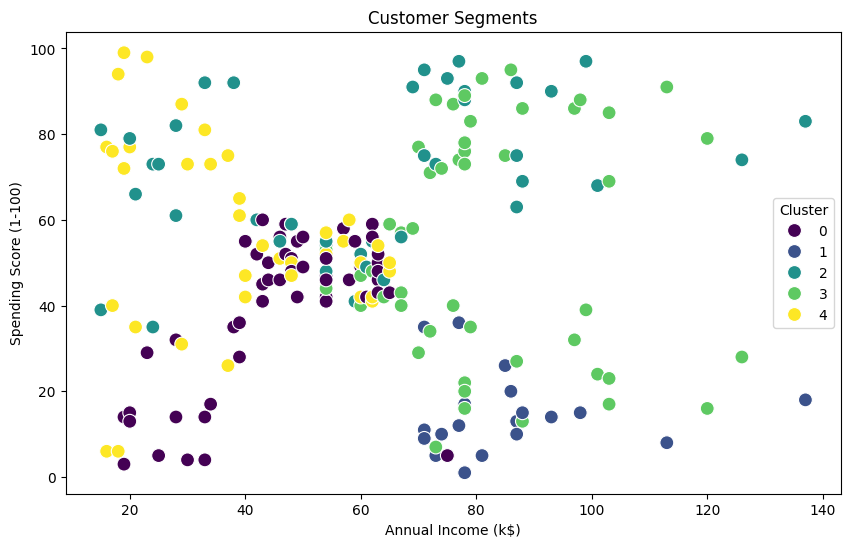

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments')
plt.show()

In [13]:
# Group by cluster and analyze the mean values
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

            Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.509804  56.470588           46.098039               39.313725
1        1.000000  39.500000           85.150000               14.050000
2        1.000000  28.690476           60.904762               70.238095
3        0.000000  37.897959           82.122449               54.448980
4        0.000000  27.315789           38.842105               56.210526


In [14]:
# Example: Predict cluster for a new data point
new_data = np.array([[25, 1, 30, 50]])  # Age, Gender (1=Male), Annual Income, Spending Score
new_data_scaled = scaler.transform(new_data)
predicted_cluster = kmeans.predict(new_data_scaled)
print(f'Predicted Cluster: {predicted_cluster[0]}')

Predicted Cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [15]:
# Example: Predict cluster for a new data point
new_data = np.array([[25, 1, 30, 50]])  # Age, Gender (1=Male), Annual Income, Spending Score
new_data_scaled = scaler.transform(new_data)
predicted_cluster = kmeans.predict(new_data_scaled)
print(f'Predicted Cluster: {predicted_cluster[0]}')

Predicted Cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [16]:
print(cluster_analysis)

            Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.509804  56.470588           46.098039               39.313725
1        1.000000  39.500000           85.150000               14.050000
2        1.000000  28.690476           60.904762               70.238095
3        0.000000  37.897959           82.122449               54.448980
4        0.000000  27.315789           38.842105               56.210526


In [17]:
import joblib

# Save the K-Means model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the scaler
joblib.dump(scaler, 'kmeans_scaler.pkl')

['kmeans_scaler.pkl']

In [19]:
# Load the K-Means model and scaler
kmeans_loaded = joblib.load('kmeans_model.pkl')
scaler_loaded = joblib.load('kmeans_scaler.pkl')

# Example: Predict cluster for new data
new_data = np.array([[25, 1, 30, 50]])  # Age, Gender (1=Male), Annual Income, Spending Score
new_data_scaled = scaler_loaded.transform(new_data)
predicted_cluster = kmeans_loaded.predict(new_data_scaled)
print(f'Predicted Cluster: {predicted_cluster[0]}')

Predicted Cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']),  # Scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre'])  # Encode categorical columns and ignore unknown categories
    ])

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# Fit the pipeline
pipeline.fit(df)

# Save the entire pipeline
joblib.dump(pipeline, 'customer_segmentation1_pipeline.pkl')

['customer_segmentation1_pipeline.pkl']

In [32]:
# Example: Predict clusters for new data
new_data = pd.DataFrame({
    'Genre': ['Male'],  # This category was not seen during training
    'Age': [55],
    'Annual Income (k$)': [150],
    'Spending Score (1-100)': [70]
})

predicted_cluster = pipeline.predict(new_data)
print(f'Predicted Cluster: {predicted_cluster[0]}')

Predicted Cluster: 3


In [ ]:
# Example: Predict clusters for new data
new_data = pd.DataFrame({
    'Genre': ['Male'],  # This category was not seen during training
    'Age': [25],
    'Annual Income (k$)': [30],
    'Spending Score (1-100)': [50]
})

predicted_cluster = pipeline.predict(new_data)
print(f'Predicted Cluster: {predicted_cluster[0]}')

In [18]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_df, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.27


In [19]:
# Example: Create a new feature
df['Income_to_Spending_Ratio'] = df['Annual Income (k$)'] / df['Spending Score (1-100)']

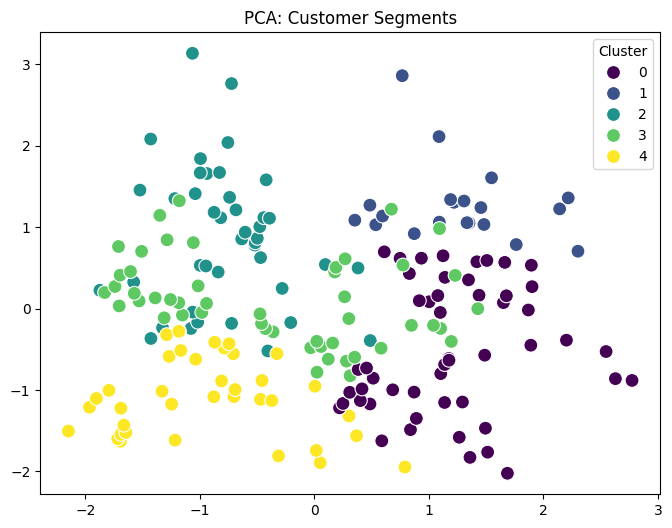

In [20]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(scaled_df)

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('PCA: Customer Segments')
plt.show()

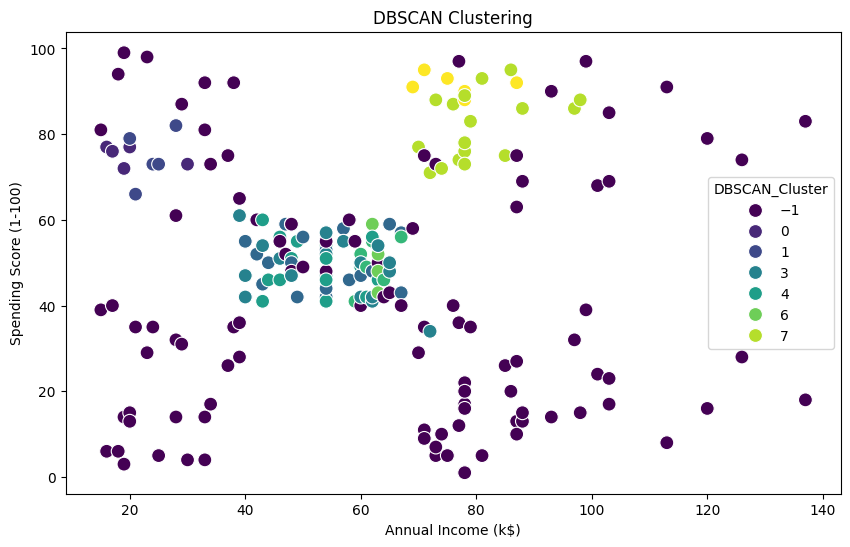

In [21]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_df)

# Add DBSCAN clusters to the dataframe
df['DBSCAN_Cluster'] = dbscan_clusters

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis', s=100)
plt.title('DBSCAN Clustering')
plt.show()

In [22]:
# Interpret Clusters
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

            Genre        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.509804  56.470588           46.098039               39.313725   
1        1.000000  39.500000           85.150000               14.050000   
2        1.000000  28.690476           60.904762               70.238095   
3        0.000000  37.897959           82.122449               54.448980   
4        0.000000  27.315789           38.842105               56.210526   

         Income_to_Spending_Ratio  DBSCAN_Cluster  
Cluster                                            
0                        1.876311        1.607843  
1                       14.372815       -1.000000  
2                        0.888099        1.523810  
3                        2.255910        2.285714  
4                        0.890410        1.000000  


In [23]:
import joblib

# Save the K-Means model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [24]:
# Load the K-Means model and scaler
kmeans_loaded = joblib.load('kmeans_model.pkl')
scaler_loaded = joblib.load('scaler.pkl')

# Example: Predict cluster for new data
new_data = np.array([[25, 1, 30, 50]])  # Age, Gender (1=Male), Annual Income, Spending Score
new_data_scaled = scaler_loaded.transform(new_data)
predicted_cluster = kmeans_loaded.predict(new_data_scaled)
print(f'Predicted Cluster: {predicted_cluster[0]}')

Predicted Cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [25]:
# Load the K-Means model and scaler
kmeans_loaded = joblib.load('kmeans_model.pkl')
scaler_loaded = joblib.load('scaler.pkl')

# Example: Predict cluster for new data
new_data = np.array([[45, 2, 10, 30]])  # Age, Gender (1=Male), Annual Income, Spending Score
new_data_scaled = scaler_loaded.transform(new_data)
predicted_cluster = kmeans_loaded.predict(new_data_scaled)
print(f'Predicted Cluster: {predicted_cluster[0]}')

Predicted Cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
